In [24]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [7]:
# Step 1: Set up paths and check if the dataset was downloaded
dataset_path = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"  # This is the directory where the dataset was downloaded

# Verify if the required files exist
X_path = os.path.join(dataset_path, "X_9_RGB.pickle")
y_path = os.path.join(dataset_path, "y_9_RGB.pickle")

if not os.path.exists(X_path) or not os.path.exists(y_path):
    raise FileNotFoundError(f"Missing dataset files! Ensure {X_path} and {y_path} exist.")


In [8]:
# Step 2: Load the data
with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

print(f"X_data shape: {X_data.shape}")
print(f"y_data shape: {y_data.shape}")

X_data shape: (1801, 224, 224, 3)
y_data shape: (1801,)


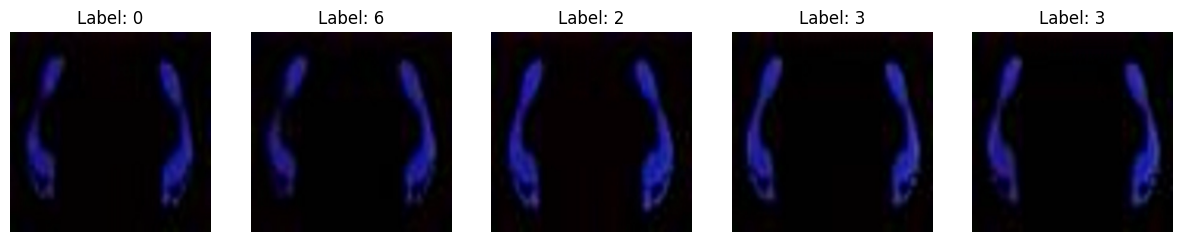

In [9]:
# Display the first 5 images along with their corresponding labels
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    axes[i].imshow(X_data[i])  # Display the image
    axes[i].set_title(f"Label: {y_data[i]}")  # Display the label
    axes[i].axis('off')  # Hide axes for better visualization

plt.show()

In [10]:
# Step 3: Preprocess the Data
# Normalize the image data to [0, 1] range
X_data = X_data / 255.0  # If X_data is in the range [0, 255], normalize it.

# Convert labels to categorical if needed (for classification)
y_data = tf.keras.utils.to_categorical(y_data)  # If it's not already in categorical format

In [11]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [12]:
# Step 5: Build the CNN Model

# Example CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')  # Adjust the output layer based on the number of classes
])

c:\DRIVE\Projects\4.3.25\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 6: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 675ms/step - accuracy: 0.2717 - loss: 2.0024 - val_accuracy: 0.7368 - val_loss: 0.7897
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 648ms/step - accuracy: 0.7925 - loss: 0.5989 - val_accuracy: 0.8227 - val_loss: 0.4154
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 742ms/step - accuracy: 0.9277 - loss: 0.2119 - val_accuracy: 0.9778 - val_loss: 0.0912
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 706ms/step - accuracy: 0.9679 - loss: 0.0904 - val_accuracy: 0.9834 - val_loss: 0.0503
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 716ms/step - accuracy: 0.9797 - loss: 0.0814 - val_accuracy: 0.9778 - val_loss: 0.0859
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 702ms/step - accuracy: 0.9782 - loss: 0.0704 - val_accuracy: 0.9695 - val_loss: 0.1456
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 611ms/step - accuracy: 0.9844 - loss: 0.0423 - val_accuracy: 0.9723 - val_loss: 0.1230
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 578ms/step - accuracy: 0.9950 - loss: 0.0288 - val_accu

In [15]:
# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

12/12 - 1s - 123ms/step - accuracy: 0.9806 - loss: 0.0688
Test Accuracy: 98.06%


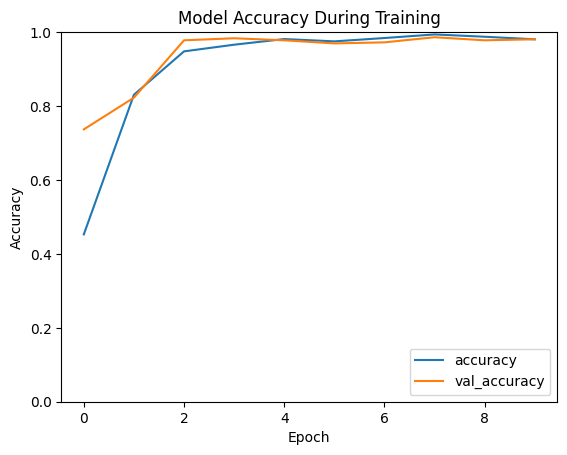

In [16]:
# Step 9: Plot the Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy During Training")
plt.show()

In [17]:
# Step 10: Make Predictions on New Data
def predict_new_data(new_data):
    new_data = np.expand_dims(new_data, axis=0)  # Add batch dimension
    prediction = model.predict(new_data)
    return np.argmax(prediction, axis=1)  # Return the class index with the highest probability

In [ ]:
# model.save('cnn_model.h5')  # Save the model

In [19]:
# Check the Structure of the Data

# Check the type of data and some sample values
print(f"First image shape: {X_data[0].shape}")
print(f"First image pixel values: \n{X_data[0]}")  # Print pixel values of the first image (not recommended for large images)
print(f"First label: {y_data[0]}")  # Print the label for the first image


First image shape: (224, 224, 3)
First image pixel values: 
[[[0.02352941 0.05098039 0.        ]
  [0.02352941 0.05098039 0.        ]
  [0.02352941 0.05098039 0.        ]
  ...
  [0.03921569 0.         0.04705882]
  [0.03529412 0.         0.04313725]
  [0.03529412 0.         0.04313725]]

 [[0.02352941 0.05098039 0.        ]
  [0.02352941 0.05098039 0.        ]
  [0.02352941 0.05098039 0.        ]
  ...
  [0.03921569 0.         0.04313725]
  [0.03529412 0.         0.04313725]
  [0.03529412 0.         0.04313725]]

 [[0.02352941 0.05098039 0.        ]
  [0.02352941 0.05098039 0.        ]
  [0.02352941 0.05098039 0.        ]
  ...
  [0.03921569 0.00392157 0.04313725]
  [0.03529412 0.         0.04313725]
  [0.03529412 0.         0.04313725]]

 ...

 [[0.         0.01960784 0.        ]
  [0.         0.01960784 0.        ]
  [0.         0.01960784 0.        ]
  ...
  [0.01960784 0.01568627 0.        ]
  [0.02352941 0.01960784 0.00392157]
  [0.02352941 0.01960784 0.00392157]]

 [[0.         

In [20]:
# Inspect Image Shape

# Example: Check the shape of the first image
print(f"Shape of the first image: {X_data[0].shape}")


Shape of the first image: (224, 224, 3)


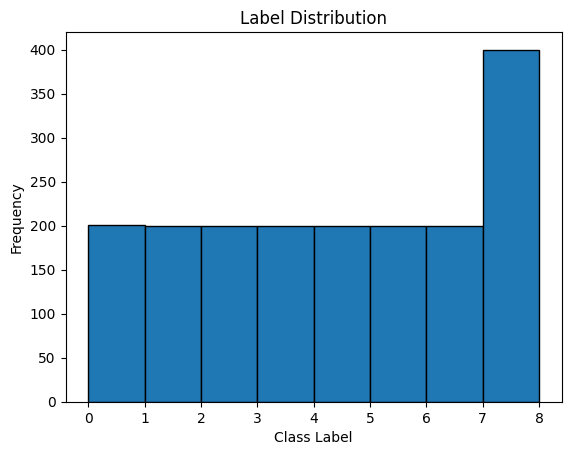

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# If y_data is one-hot encoded, convert it to class labels (argmax)
if len(y_data.shape) > 1:  # Check if it's one-hot encoded
    y_data = np.argmax(y_data, axis=1)

# Plot the distribution of the labels
plt.hist(y_data, bins=np.arange(min(y_data), max(y_data) + 1, 1), edgecolor='black')
plt.title("Label Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()


In [22]:
# Check the Number of Classes

num_classes = len(np.unique(y_data))
print(f"Number of classes: {num_classes}")


Number of classes: 9


In [28]:
from collections import Counter

# Count instances per class
class_counts = Counter(y_data)
print(f"Number of classes: {len(class_counts)}")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")


Number of classes: 9
Class 0: 201 samples
Class 6: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples
Class 8: 200 samples
Class 5: 200 samples
Class 7: 200 samples
Class 1: 200 samples


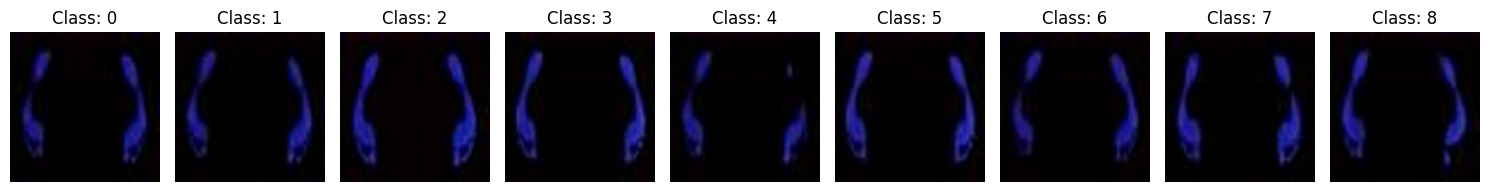

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
num_classes = 9  # We assume you have 9 classes as per your requirement

# Prepare a list to store one image per class
images_per_class = []

# Loop through each class and select one image from that class
for class_label in range(num_classes):
    # Find the first image of the given class label
    class_indices = np.where(y_data == class_label)[0]
    
    if len(class_indices) > 0:
        # Select the first image from this class
        first_image_index = class_indices[0]
        images_per_class.append(X_data[first_image_index])  # Append the image

# Create a figure with subplots in a single row to display images
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))

# Loop through the selected images and display them
for i in range(num_classes):
    axes[i].imshow(images_per_class[i])
    axes[i].set_title(f"Class: {i}")
    axes[i].axis('off')  # Hide the axis for better visualization

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
model.save('cnn_model.h5')  # Save the model

Download data

In [27]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Define the directory where the samples will be saved
save_dir = "sampleinput"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Step 1: Ensure we get one random sample from each class (if there are at least 9 different classes)
unique_classes = np.unique(np.argmax(y_test, axis=1))  # Get unique class labels from the test set

# Make sure there are at least 9 classes
if len(unique_classes) < 9:
    print(f"Warning: There are only {len(unique_classes)} unique classes in the test set.")
    exit(1)

# Randomly select one sample from each class
random_samples = {}
for class_label in unique_classes[:9]:  # Only take the first 9 classes
    class_indices = np.where(np.argmax(y_test, axis=1) == class_label)[0]  # Indices of the current class
    random_sample_index = random.choice(class_indices)  # Randomly select one index from the class
    random_samples[class_label] = random_sample_index  # Store the index for the current class

# Step 2: Save the selected images as files
for i, (class_label, idx) in enumerate(random_samples.items()):
    # Extract the image and label
    image = X_test[idx]
    label = class_label  # Direct class label
    
    # Step 3: Save the image
    image_path = os.path.join(save_dir, f"sample_{i+1}_label_{label}.png")

    # If the image is in RGB format, you can save it as an image file
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(image_path)
    plt.close()  # Close the plot to avoid memory overload

    print(f"Sample {i+1} saved to: {image_path} with label: {label}")

# Step 4: Check the stored files
print("Random samples saved successfully!")


Sample 1 saved to: sampleinput\sample_1_label_0.png with label: 0
Sample 2 saved to: sampleinput\sample_2_label_1.png with label: 1
Sample 3 saved to: sampleinput\sample_3_label_2.png with label: 2
Sample 4 saved to: sampleinput\sample_4_label_3.png with label: 3
Sample 5 saved to: sampleinput\sample_5_label_4.png with label: 4
Sample 6 saved to: sampleinput\sample_6_label_5.png with label: 5
Sample 7 saved to: sampleinput\sample_7_label_6.png with label: 6
Sample 8 saved to: sampleinput\sample_8_label_7.png with label: 7
Sample 9 saved to: sampleinput\sample_9_label_8.png with label: 8
Random samples saved successfully!
